In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import string
import datetime
import math
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

# 1. Data Reading

In [2]:
# import dataset into a pandas data frame
df_bank = pd.read_csv('Churn Modeling.csv')

In [3]:
# check unique values of each column
for column in df_bank.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_bank[column].unique()))

Column: RowNumber - Unique Values: [    1     2     3 ...  9998  9999 10000]
Column: CustomerId - Unique Values: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Column: Surname - Unique Values: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Column: CreditScore - Unique Values: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 71

# 2. Exploratory Data Analysis and Data Cleaning


In [4]:
# drop the RowNumber, CustomerID column from the dataset since they will not effect the churn rate
df_bank.drop(columns=['CustomerId','RowNumber','Surname'], inplace=True)

In [5]:
# to view the data more clearly, replace "0", "1" with "No", "Yes" in 'Exited' column
    # transform the column Existed into a object data type
df_bank['Exited'] = df_bank['Exited'].astype(str)

df_bank['Exited'] = df_bank['Exited'].replace('0','No').replace('1','Yes')
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [28]:
# remove outliers
outliers_cols=['CreditScore','Balance','EstimatedSalary']
q1=df_bank[outliers_cols].quantile(0.25)
q2=df_bank[outliers_cols].quantile(0.75)
IQR=q2-q1
df_bank=df_bank[~((df_bank<(q1-1.5*IQR))|(df_bank>(q2+1.5*IQR))).any(axis=1)]

# 3. Data Visualization

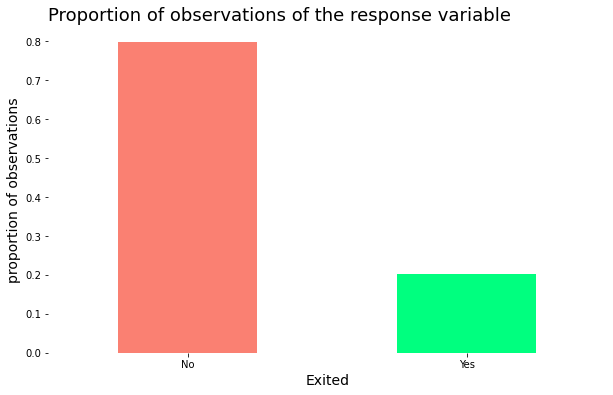

In [7]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df_bank['Exited'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['salmon','springgreen'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('Exited',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

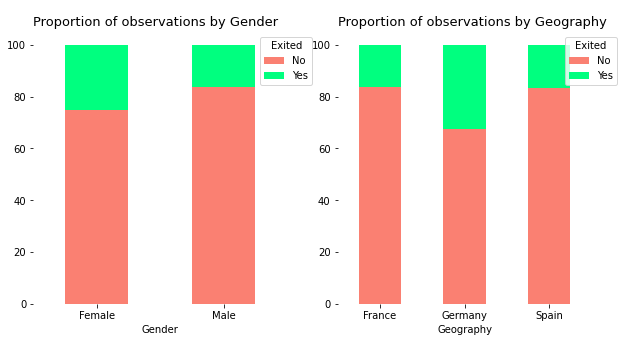

In [8]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(10, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    
     # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df_bank[column], df_bank['Exited']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['salmon','springgreen'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Exited', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=13, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

# demographic information
# demographic column names
demographic_columns = ['Gender', 'Geography']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, ' ')

### Conclusions:
1. Female customers churn less than male customers.
2. German customers churn less than Franch customers and Spainish customers. But there is no significant predictive power for Franch and Spainish customers. A similar percentage of churn is shown both when a customer is a Franch or a Spainish.

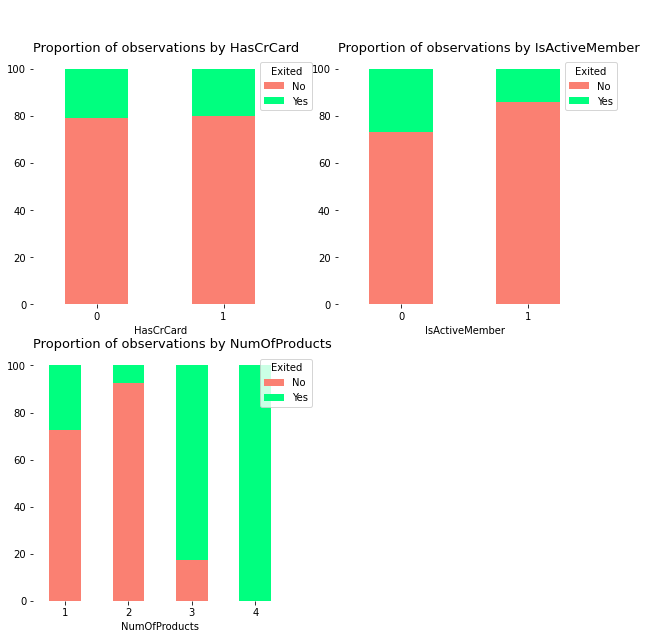

In [9]:
# Customer account information--Categorical variables
# customer account column names
account_columns = ['HasCrCard', 'IsActiveMember','NumOfProducts']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, ' ')

## Conclusions:
1. We do not expect Credit Card Ownership to have significant predictive power. A similar percentage of churn is shown both when a customer has a credit card and does not have a credit card.
2. Active customers churn more than nonactive customers.

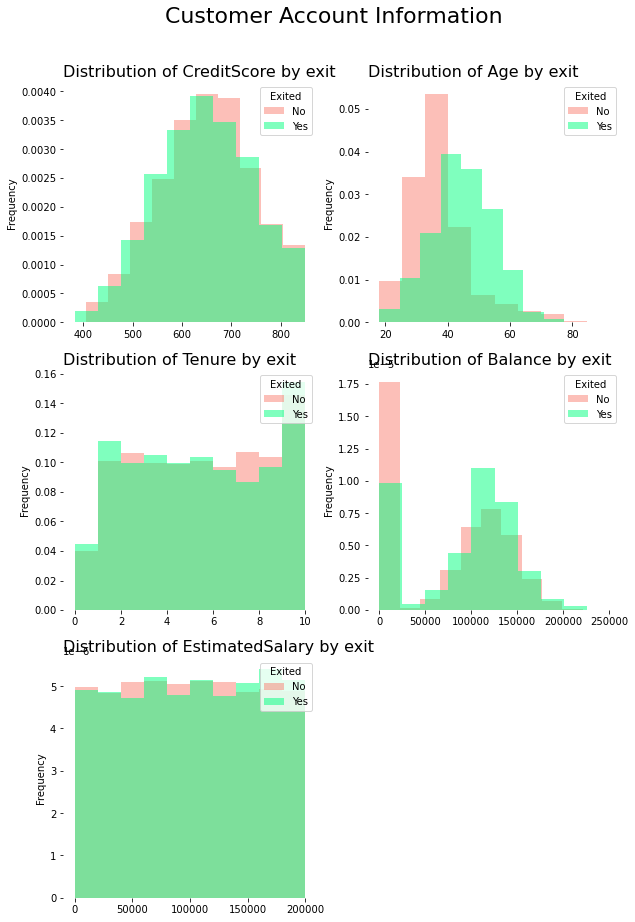

In [10]:
def histogram_plots(columns_to_plot, super_title):

    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(10, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    
     # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)


        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df_bank[df_bank['Exited']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='salmon', label='No')
        df_bank[df_bank['Exited']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='springgreen', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Exited', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by exit',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        #eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

# Customer Account Information — Numerical variables
# customer account column names
account_columns_numeric = ['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')

## Conclusions:
1. Younger customers churn more than older customers.
2. Customers without balance in account churn more than others.

# 4. Feature importance


In [11]:
from sklearn.metrics.cluster import mutual_info_score
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_bank.Exited)

# select categorial variables excluding the response variable 
categorical_variables = df_bank.select_dtypes(include=object).drop('Exited', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Geography    0.014092
Gender       0.005644
dtype: float64


 As shown above, gender has a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

# 5. Feature Engineering


In [12]:
df_bank_transformed = df_bank.copy()

# label encoding
df_bank_transformed['Exited'] = df_bank_transformed['Exited'].map({'Yes': 1, 'No': 0})
df_bank_transformed.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# one-hot encoding
one_hot_encoding_columns = ['Gender','Geography']

# encode categorical variables with more than two levels using one-hot encoding
df_bank_transformed = pd.get_dummies(df_bank_transformed, columns = one_hot_encoding_columns)
df_bank_transformed.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [14]:
# min-max normalization (numeric variables)
min_max_columns = ['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary','NumOfProducts']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_bank_transformed[column].min()
        # maximum value of the column
        max_column = df_bank_transformed[column].max()
        # min max scaler
        df_bank_transformed[column] = (df_bank_transformed[column] - min_column) / (max_column - min_column) 

df_bank_transformed.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.505353,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,1,0,0
1,0.481799,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,1,0,0,0,1
2,0.254818,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,1,0,0
3,0.676660,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,1,0,0
4,1.000000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1,0,0,0,1


# 6. Splitting the data in training and testing sets

In [15]:
# select independent variables
X = df_bank_transformed.drop(columns='Exited')

# select dependent variables
y = df_bank_transformed.loc[:, 'Exited']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')
Exited


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

# 7. Assessing multiple algorithms

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def create_models(seed=2):
    
    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [18]:
from sklearn.metrics import accuracy_score
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.7941529835802964)
Classifier: k_nearest_neighbors, Accuracy: 0.8073688426111334)
Classifier: logistic_regression, Accuracy: 0.8133760512615138)
Classifier: support_vector_machines, Accuracy: 0.8325991189427313)
Classifier: random_forest, Accuracy: 0.855026031237485)
Classifier: gradient_boosting, Accuracy: 0.8626351621946335)


# 8. Hyperparameter tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# define the parameter grid
grid_parameters = {'n_estimators': [ 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [ 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=100,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 90, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 5}


# 9. Performace of the model

In [22]:
from sklearn.metrics import confusion_matrix
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1912,   71],
       [ 273,  241]])

In [25]:
from sklearn.metrics import classification_report
# print classification report 
print(classification_report(y_test, random_search_predictions))
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1983
           1       0.77      0.47      0.58       514

    accuracy                           0.86      2497
   macro avg       0.82      0.72      0.75      2497
weighted avg       0.85      0.86      0.85      2497



0.8622346816179415